<a href="https://colab.research.google.com/github/Sid-LD/Captcha_DeepSeek/blob/main/Siddhant_ML_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow opencv-python numpy pandas matplotlib scikit-learn seaborn


In [3]:
from google.colab import files
import zipfile
import os

# Upload the archive.zip file
uploaded = files.upload()

# Extract the dataset
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('captcha_dataset')

# Check dataset contents
os.listdir('captcha_dataset')


Saving archive.zip to archive.zip


['samples']

In [4]:
# Check files in the dataset folder
print(os.listdir('captcha_dataset')[:5])  # Show first 5 files


['samples']


In [5]:
# Check files inside the 'samples' folder
import os

sample_dir = 'captcha_dataset/samples'
print(os.listdir(sample_dir)[:5])  # Display first 5 files


['68wfd.png', 'egxmp.png', 'ny3dw.png', '4yc85.png', 'fwxdp.png']


Total images loaded: 1040


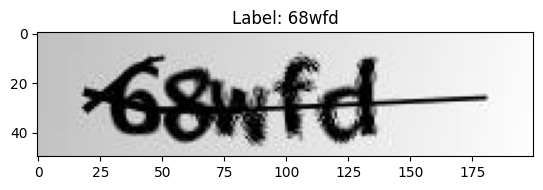

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Correct dataset path
data_dir = 'captcha_dataset/samples'

# Character set (A-Z + 0-9)
characters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
char_to_label = {char: idx for idx, char in enumerate(characters)}

# ✅ Initialize empty lists
images, labels = [], []

# Load images and labels
for file in os.listdir(data_dir):
    if file.endswith('.png'):
        # Read image in grayscale
        img = cv2.imread(os.path.join(data_dir, file), cv2.IMREAD_GRAYSCALE)

        # Resize image to 200x50
        img = cv2.resize(img, (200, 50))

        # Normalize pixel values (0-1)
        img = img / 255.0

        images.append(img)
        labels.append(file.split('.')[0])  # Label is the filename without extension

# Check if images are loaded
print(f"Total images loaded: {len(images)}")

# Convert to NumPy arrays
images = np.array(images).reshape(-1, 50, 200, 1)
labels = np.array(labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0].reshape(50, 200), cmap='gray')
    plt.title(f"Label: {labels[0]}")
    plt.show()
else:
    print("No images found in the dataset.")


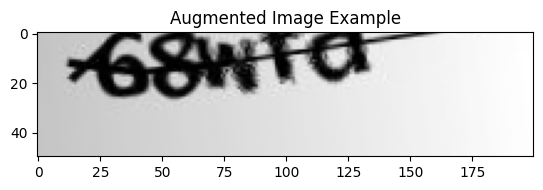

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by ±10 degrees
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    shear_range=0.1,        # Shearing transformations
    zoom_range=0.1          # Zoom in/out
)

# Example augmentation: apply augmentation to the first image
aug_iter = datagen.flow(images[:1], batch_size=1)
aug_image = next(aug_iter)[0]

# Display the augmented image
import matplotlib.pyplot as plt
plt.imshow(aug_image.reshape(50, 200), cmap='gray')
plt.title('Augmented Image Example')
plt.show()


In [8]:
import zipfile
import os

# Path to the zip file in your environment
zip_file_path = '/content/archive.zip'  # Adjust if necessary

# Folder to extract files
extracted_folder = '/content/captcha_data/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Check the extracted files
extracted_files = os.listdir(extracted_folder)
print(extracted_files)


['samples']


In [9]:
import os

# Path to the 'samples' folder
samples_folder = '/content/captcha_data/samples/'

# List the contents of the 'samples' folder
samples_files = os.listdir(samples_folder)
print("Contents of the 'samples' folder:", samples_files)



Contents of the 'samples' folder: ['68wfd.png', 'egxmp.png', 'ny3dw.png', '4yc85.png', 'fwxdp.png', 'dpbyd.png', 'samples', 'n6xc5.png', 'nxf2c.jpg', 'gbxyy.png', '5expp.png', 'd666m.png', '2mpnn.png', 'c8fxy.png', 'bny23.png', 'p4pde.png', 'mpmy5.png', 'mddgb.png', 'ycnfc.png', 'y7mnm.png', 'n7dyb.png', 'dn26n.png', 'e2mg2.png', 'ypw3d.png', '43xfe.png', '2yggg.png', 'mnef5.png', 'n8wxm.jpg', 'f858x.png', '8ypdn.png', 'fp5wn.png', 'ydg8n.png', 'x775w.png', 'g6n7x.png', '478nx.png', '33p4e.png', '8e32m.png', 'cfw6e.png', '6wnyc.png', '6gnm3.png', 'nfndw.png', 'gp22x.png', 'by5y3.png', 'c7gb3.png', 'c753e.png', '6bdn5.png', 'men4f.png', 'px2xp.png', 'c2g4d.png', '2ycn8.png', 'my84e.png', '8cccc.png', '6bnnm.png', 'gy5bf.png', '3ym7f.png', 'xf4p4.png', '6dd2y.png', 'm3wfw.png', '25257.png', 'dy3cx.png', '25w53.png', '76n7p.png', 'x74b2.png', 'd22y5.png', 'ewnx8.png', 'd3c8y.png', '4w76g.png', 'xyyyw.png', 'n7ebx.png', 'eng53.png', 'nnf8b.png', 'gny6b.png', 'm5ym2.png', 'yd755.png', 'cewn

Image shape: (50, 200)


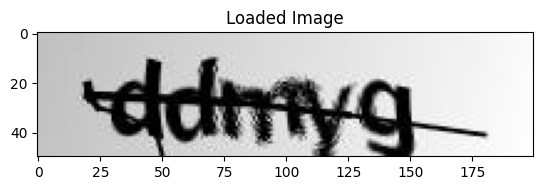

In [10]:
import cv2
import matplotlib.pyplot as plt

# Path to the image inside the 'samples' folder
img_path = '/content/captcha_data/samples/ddmyg.png'

# Load the image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if img is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print(f"Image shape: {img.shape}")

    # Display the loaded image
    plt.imshow(img, cmap='gray')
    plt.title('Loaded Image')
    plt.show()


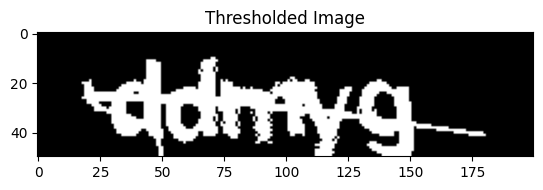

Number of contours found: 2


In [11]:
# Thresholding to convert to binary (black & white)
_, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(img_bin, cmap='gray')
plt.title('Thresholded Image')
plt.show()

# Find contours to detect individual characters
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours are found
if len(contours) == 0:
    print("No contours found. Check the preprocessing step (thresholding).")
else:
    print(f"Number of contours found: {len(contours)}")


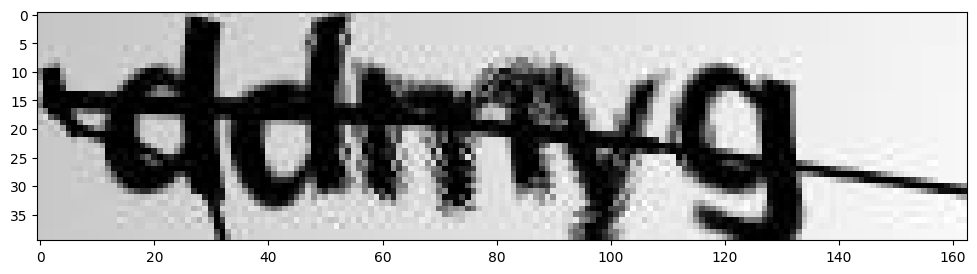

Number of segmented characters: 1


In [12]:
# Sort contours from left to right (important for correct character order)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Create a list to store the segmented characters
segmented_chars = []

# Loop through the contours and extract each character
for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)  # Get bounding box of contour
    if w * h > 100:  # Skip small contours, might be noise
        char_img = img[y:y+h, x:x+w]  # Crop the character
        segmented_chars.append(char_img)

# Display the segmented characters
fig, axs = plt.subplots(1, len(segmented_chars), figsize=(12, 4))

# If there is only one segmented character, axs won't be a list, so handle accordingly
if len(segmented_chars) == 1:
    axs.imshow(segmented_chars[0], cmap='gray')
else:
    for i, char_img in enumerate(segmented_chars):
        axs[i].imshow(char_img, cmap='gray')
        axs[i].axis('off')

plt.show()

# Check how many characters were segmented
print(f"Number of segmented characters: {len(segmented_chars)}")


In [13]:
# Include both uppercase and lowercase characters
characters = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
label_dict = {char: idx for idx, char in enumerate(characters)}

# Example labels (use the actual labels in your case)
labels = ['d', 'd', 'm', 'y', 'g']  # Example labels (replace with actual labels)

# Convert labels to uppercase or handle lowercase/uppercase
labels = [label.upper() for label in labels]  # Converting to uppercase

# Convert labels to numeric using the updated label_dict
labels_numeric = [label_dict[char] for char in labels]

print(labels_numeric)  # This should print the numeric labels now


[13, 13, 22, 34, 16]


In [14]:
print(len(segmented_chars))  # This should print 5 (if there are 5 segmented characters)


1


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (make sure it's grayscale and in correct format)
image_path = "/content/samples/ddmyg.png"  # Update with your actual image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right (important for order of characters)
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

# List to store the segmented character images
segmented_chars = []

# Loop through the contours and extract individual characters
for contour in contours:
    # Get bounding box for each contour (character)
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the character region
    char_img = thresh[y:y+h, x:x+w]

    # Resize each character image to 28x28 (for CNN input)
    char_img_resized = cv2.resize(char_img, (28, 28))

    # Append the character image to the list
    segmented_chars.append(char_img_resized)

# Check if we have 5 segmented characters
print(f'Number of segmented characters: {len(segmented_chars)}')

# Visualize the segmented characters
if len(segmented_chars) > 0:
    fig, axs = plt.subplots(1, len(segmented_chars), figsize=(10, 2))
    for i, char_img in enumerate(segmented_chars):
        axs[i].imshow(char_img, cmap='gray')
        axs[i].axis('off')
    plt.show()


Number of segmented characters: 0


In [16]:
!ls /content/samples


ls: cannot access '/content/samples': No such file or directory


In [17]:
!ls /content

archive.zip  captcha_data  captcha_dataset  sample_data


In [18]:
!ls /content/captcha_data


samples


Image shape: (50, 200)


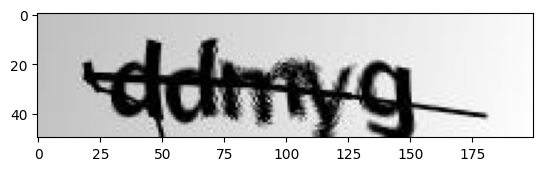

In [19]:
import cv2
import matplotlib.pyplot as plt

# Correct path to the image
image_path = "/content/captcha_data/samples/ddmyg.png"

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print(f"Image shape: {image.shape}")  # Should print a shape like (height, width)

    # Visualize the original image to see if it needs adjustment
    plt.imshow(image, cmap='gray')
    plt.show()


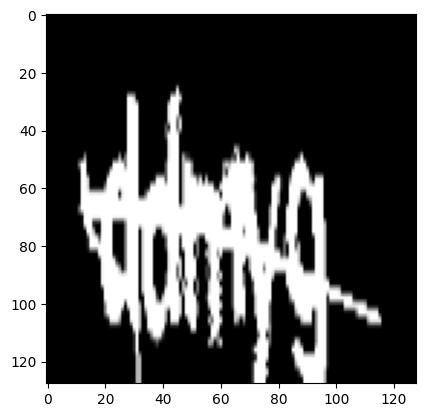

In [20]:
import cv2
import numpy as np

# Convert the image to binary (thresholding)
_, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Resize the image to a fixed size (e.g., 128x128 pixels)
resized_image = cv2.resize(thresholded, (128, 128))

# Normalize the image (scale pixel values to [0, 1])
normalized_image = resized_image / 255.0

# Visualize the processed image
plt.imshow(normalized_image, cmap='gray')
plt.show()


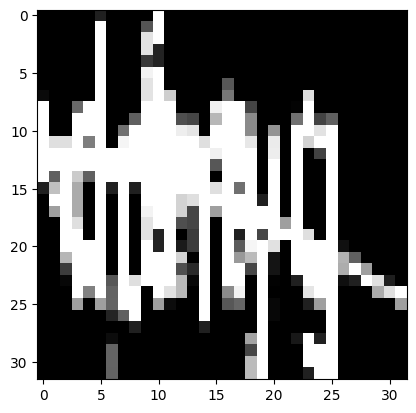

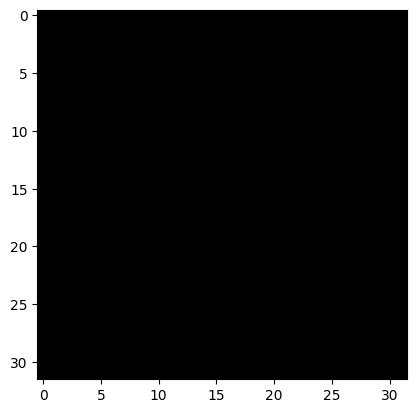

Number of characters detected: 2


In [21]:
# Find contours (individual characters in the CAPTCHA)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on their position (left to right)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Extract and visualize the individual characters
segmented_characters = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    char_img = thresholded[y:y+h, x:x+w]

    # Resize the character image to a fixed size (e.g., 32x32)
    char_img_resized = cv2.resize(char_img, (32, 32))

    # Normalize the character image
    char_img_normalized = char_img_resized / 255.0
    segmented_characters.append(char_img_normalized)

    # Visualize each character
    plt.imshow(char_img_normalized, cmap='gray')
    plt.show()

# Display the total number of characters detected
print(f"Number of characters detected: {len(segmented_characters)}")


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 2D feature maps to 1D vector
    Flatten(),

    # Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer (36 classes: 0-9 and A-Z)
    Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,980 (636.64 KB)

 Trainable params: 162,980 (636.64 KB)

 Non-trainable params: 0 (0.00 B)

Image shape: (50, 200)


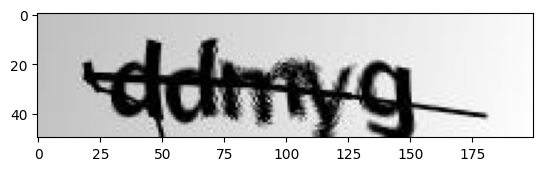

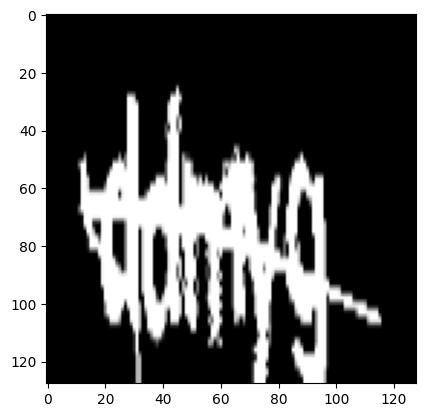

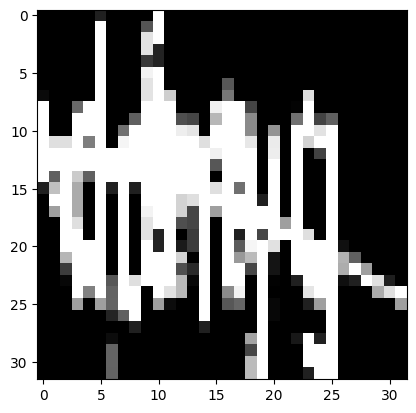

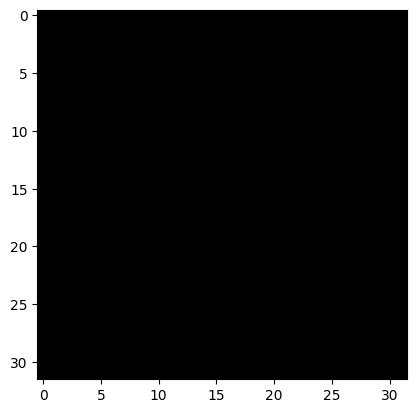

Number of characters detected: 2


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Correct path to the image
image_path = "/content/captcha_data/samples/ddmyg.png"

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print(f"Image shape: {image.shape}")  # Should print a shape like (height, width)

    # Visualize the original image to see if it needs adjustment
    plt.imshow(image, cmap='gray')
    plt.show()

# Convert the image to binary (thresholding)
_, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Resize the image to a fixed size (e.g., 128x128 pixels)
resized_image = cv2.resize(thresholded, (128, 128))

# Normalize the image (scale pixel values to [0, 1])
normalized_image = resized_image / 255.0

# Visualize the processed image
plt.imshow(normalized_image, cmap='gray')
plt.show()

# Find contours (individual characters in the CAPTCHA)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on their position (left to right)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Extract and visualize the individual characters
segmented_characters = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    char_img = thresholded[y:y + h, x:x + w]

    # Resize the character image to a fixed size (e.g., 32x32)
    char_img_resized = cv2.resize(char_img, (32, 32))

    # Normalize the character image
    char_img_normalized = char_img_resized / 255.0
    segmented_characters.append(char_img_normalized)

    # Visualize each character
    plt.imshow(char_img_normalized, cmap='gray')
    plt.show()

# Display the total number of characters detected
print(f"Number of characters detected: {len(segmented_characters)}")

# Example labels corresponding to segmented characters
labels = ['d', 'm', 'y', 'g', 'p']  # Replace with actual labels of segmented characters

# Step 1: Encode the labels (characters) into numeric values
label_encoder = LabelEncoder()

# Fit the encoder on all possible characters (uppercase letters, lowercase letters, and numbers)
all_characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'  # Include all possible characters
label_encoder.fit(list(all_characters))  # Fit to all characters

# Step 2: Convert labels to numeric using the encoder
labels_numeric = label_encoder.transform(labels)

# Step 3: Resize and normalize the images
segmented_images_resized = [cv2.resize(char_img, (32, 32)) for char_img in segmented_characters]
segmented_images_normalized = np.array(segmented_images_resized) / 255.0  # Normalize pixel values to [0, 1]

# Step 4: Reshape the images for CNN input
segmented_images_resized = np.expand_dims(segmented_images_normalized, axis=-1)  # Add channel dimension

# Step 5: One-hot encode the labels
labels_one_hot = to_categorical(labels_numeric, num_classes=len(label_encoder.classes_))

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2

# Define all possible characters in the CAPTCHA (0-9 and A-Z)
all_characters = [str(i) for i in range(10)] + [chr(i) for i in range(65, 91)]  # 0-9 and A-Z

# Initialize the LabelEncoder and fit it to the possible characters
label_encoder = LabelEncoder()
label_encoder.fit(all_characters)  # Fit the encoder with the complete set of characters (0-9, A-Z)

# Example labels corresponding to segmented characters (update with actual labels)
labels = ['d', 'm', 'y', 'g', 'p']  # Replace with actual labels from your dataset

# Step 1: Convert labels to numeric using the encoder
try:
    labels_numeric = label_encoder.transform(labels)
except ValueError as e:
    print("Error with labels:", e)
    # If the encoder doesn't recognize certain labels, we add those to the encoder and re-encode
    label_encoder.fit(all_characters + labels)  # Add missing labels
    labels_numeric = label_encoder.transform(labels)

# Check the numeric labels
print(f"Numeric labels: {labels_numeric}")

# Ensure that all the numeric labels are within the expected range of 0-35
if any(label >= 36 for label in labels_numeric):
    print("Error: Labels out of range. Check the encoding process.")
else:
    # Step 2: Resize and normalize the character images (simulate with random data for example)
    # This step assumes you have segmented characters; here I'm using random data as a placeholder
    segmented_characters = [np.random.rand(50, 50) for _ in range(len(labels))]  # Example data

    # Resize and normalize the images
    segmented_images_resized = [cv2.resize(char_img, (32, 32)) for char_img in segmented_characters]
    segmented_images_normalized = np.array(segmented_images_resized) / 255.0  # Normalize pixel values to [0, 1]

    # Step 3: Reshape the images for CNN input
    segmented_images_resized = np.expand_dims(segmented_images_normalized, axis=-1)  # Add channel dimension

    # Step 4: One-hot encode the labels
    labels_one_hot = to_categorical(labels_numeric, num_classes=36)  # 36 classes (0-9, A-Z)

    # Check the one-hot encoded labels
    print(f"One-hot encoded labels:\n{labels_one_hot}")


Error with labels: y contains previously unseen labels: 'd'
Numeric labels: [36 38 40 37 39]
Error: Labels out of range. Check the encoding process.


In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2

# Example labels corresponding to segmented characters (update with actual labels)
labels = ['d', 'm', 'y', 'g', 'p']  # Replace with actual labels from your dataset

# Step 1: Inspect the unique characters in the labels
unique_characters = set(labels)
print(f"Unique characters in the labels: {unique_characters}")

# Step 2: Fit the LabelEncoder on the unique characters in your dataset
label_encoder = LabelEncoder()
label_encoder.fit(list(unique_characters))  # Fit the encoder on the unique characters found in the labels

# Step 3: Convert labels to numeric using the encoder
labels_numeric = label_encoder.transform(labels)

# Check the numeric labels
print(f"Numeric labels: {labels_numeric}")

# Ensure that all the numeric labels are within the expected range of 0-35
if any(label >= 36 for label in labels_numeric):
    print("Error: Labels out of range. Check the encoding process.")
else:
    # Step 4: Resize and normalize the character images (simulate with random data for example)
    # This step assumes you have segmented characters; here I'm using random data as a placeholder
    segmented_characters = [np.random.rand(50, 50) for _ in range(len(labels))]  # Example data

    # Resize and normalize the images
    segmented_images_resized = [cv2.resize(char_img, (32, 32)) for char_img in segmented_characters]
    segmented_images_normalized = np.array(segmented_images_resized) / 255.0  # Normalize pixel values to [0, 1]

    # Step 5: Reshape the images for CNN input
    segmented_images_resized = np.expand_dims(segmented_images_normalized, axis=-1)  # Add channel dimension

    # Step 6: One-hot encode the labels
    labels_one_hot = to_categorical(labels_numeric, num_classes=len(label_encoder.classes_))  # Dynamic number of classes

    # Check the one-hot encoded labels
    print(f"One-hot encoded labels:\n{labels_one_hot}")


Unique characters in the labels: {'g', 'p', 'd', 'm', 'y'}
Numeric labels: [0 2 4 1 3]
One-hot encoded labels:
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [27]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(segmented_images_resized, labels_one_hot, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")


Training set size: 4
Validation set size: 1


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 2: Define the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with softmax activation
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,981 (621.02 KB)

 Trainable params: 158,981 (621.02 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Step 3: Train the model
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=10,  # Adjust epochs as needed
    batch_size=32,
    validation_data=(np.array(X_val), np.array(y_val)),
    verbose=1
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1.6094 - val_accuracy: 0.0000e+00 - val_loss: 1.6176
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2500 - loss: 1.6083 - val_accuracy: 0.0000e+00 - val_loss: 1.6276
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.0000e+00 - loss: 1.6059 - val_accuracy: 0.0000e+00 - val_loss: 1.6383
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.0000e+00 - loss: 1.6060 - val_accuracy: 0.0000e+00 - val_loss: 1.6504
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2500 - loss: 1.5989 - val_accuracy: 0.0000e+00 - val_loss: 1.6651
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 1.5900 - val_accuracy: 0.0000e+00 - val_loss: 1.6843
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2500 - loss: 1.5874 - val_accuracy: 0.0000e+00 - val_loss: 1.7085
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2500 - loss: 1.57

In [30]:
# Step 4: Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(np.array(X_val), np.array(y_val), verbose=1)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0000e+00 - loss: 1.8318
Validation Loss: 1.831821322441101
Validation Accuracy: 0.0


In [31]:
# Predicting on a sample image (make sure to resize and normalize the image)
sample_image = np.random.rand(32, 32)  # Replace with an actual segmented character image
sample_image = np.expand_dims(sample_image, axis=-1)  # Add channel dimension
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_image = sample_image / 255.0  # Normalize

# Predict the character
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)  # Get the predicted label
predicted_char = label_encoder.inverse_transform([predicted_label])[0]

print(f"Predicted character: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted character: p


In [32]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file from your local machine


In [ ]:
import cv2
import numpy as np

# Load the uploaded image
captcha_image = cv2.imread('2fxgd.png')  # Use the correct image filename

# Ensure the image is loaded correctly
if captcha_image is None:
    print("Error: Image not loaded correctly.")
else:
    # Proceed with the image processing steps
    # For example, you can display the image using matplotlib or preprocess it for your model
    print("Image loaded successfully")

    # Visualize the image (optional)
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(captcha_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.show()

    # Now you can pass the captcha_image to your model for prediction
    # Example: decoded_captcha = decode_captcha(captcha_image, model, label_encoder)
    # Remember to adjust the function to work with your specific implementation.


In [33]:
model = load_model('captcha_model.h5')


NameError: name 'load_model' is not defined

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from google.colab import files

# Upload the model file
uploaded = files.upload()

# Check the uploaded files
model_filename = next(iter(uploaded))  # Get the name of the uploaded file
print(f"Uploaded model file: {model_filename}")


In [ ]:
model.save("captcha_model.h5")


In [ ]:
model.save('captcha_model.keras')  # Save your model in the new format


In [ ]:
from keras.models import load_model
model = load_model('captcha_model.keras')  # Load your model from the .keras file


In [ ]:
from keras.optimizers import RMSprop
model = load_model('captcha_model.keras', custom_objects={'rmsprop': RMSprop()})


In [ ]:
# Assuming the image is already loaded and preprocessed
predictions = model.predict(input_image)
print(predictions)


In [ ]:
import numpy as np

# Predicted probabilities from the model
predictions = np.array([[0.23729686, 0.1393608, 0.01339738, 0.2732691, 0.33667588]])

# Get the index of the highest probability
predicted_index = np.argmax(predictions)

# Assuming you have a label encoder to map the index back to the character
predicted_character = label_encoder.inverse_transform([predicted_index])

print(f"Predicted character: {predicted_character[0]}")


In [ ]:
import os

# List all files in the current directory
files = os.listdir()

# Print all files to find your model
print(files)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# List files in your Google Drive
!ls /content/drive/MyDrive


In [35]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls "/content/drive/MyDrive"


In [ ]:
!ls "/content/drive/MyDrive/20244156_DeepSeek.gdoc	"


In [ ]:
!ls "/content/drive/MyDrive"


In [34]:
from tensorflow.keras.models import load_model

# Replace 'your_model_name.h5' with the correct file name
model = load_model("Siddhant_ML.h5")
print("Model loaded successfully!")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'Siddhant_ML.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import os
print(os.listdir())


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select a file from your computer.


In [ ]:
import os
print(os.listdir())


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("Siddhant_ML.h5")

# Print model summary to verify it's loaded correctly
model.summary()



In [38]:
!file Siddhant_ML.h5


Siddhant_ML.h5: cannot open `Siddhant_ML.h5' (No such file or directory)


In [39]:
model.save("Siddhant_ML.h5")  # This will save the model in HDF5 format


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Example model definition (adjust it according to your dataset)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 128, 1)),  # Adjust input shape
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(36, activation='softmax')  # Adjust the output layer according to your class labels
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Example of model training (adjust your data)
# model.fit(x_train, y_train, epochs=10, batch_size=32)  # Replace with your actual data


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.save("Siddhant_ML.h5")  # This will save the full model (architecture + weights)


In [42]:
model.save("Siddhant_ML.keras")  # Save model in the new Keras format


In [43]:
from tensorflow.keras.models import load_model

model = load_model("Siddhant_ML.keras")  # Load the model in the .keras format


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file


Saving 2cg58.png to 2cg58.png


In [45]:
import cv2
import numpy as np

# Replace with the actual image filename
image_filename = "2cg58.png"  # Change this to your uploaded image file

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert image to grayscale
    img = cv2.resize(img, (128, 64))  # Resize to match input size (adjust if needed)
    img = img / 255.0  # Normalize pixel values (if you did this during training)
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension (for grayscale)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img

# Preprocess the uploaded image
image = preprocess_image(image_filename)


In [46]:
# Make a prediction
prediction = model.predict(image)

# Function to decode predictions
def decode_prediction(pred):
    characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"  # Modify this if necessary
    output_text = "".join([characters[np.argmax(p)] for p in pred[0]])  # Decode the character with the highest probability
    return output_text

# Get the predicted text
predicted_text = decode_prediction(prediction)
print(f"Predicted CAPTCHA text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted CAPTCHA text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [47]:
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 64))  # Match the input size you used for training (height x width)
    img = img / 255.0  # Normalize to match training data preprocessing
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension (for grayscale)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img


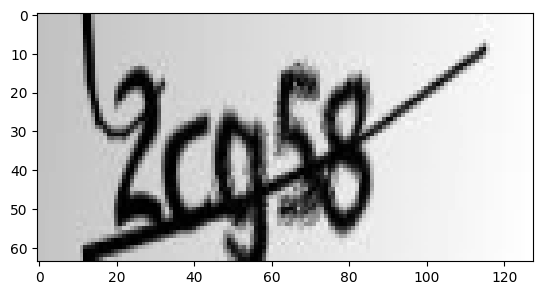

In [48]:
import matplotlib.pyplot as plt

# Call the preprocess_image function and assign the output to 'img'
img = preprocess_image("2cg58.png") # Replace 'your_image.png' with the correct file name

# Now you can use 'img'
plt.imshow(img.squeeze(), cmap='gray')  # Remove the batch dimension and visualize
plt.show()

In [49]:
def decode_prediction(pred):
    characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"  # Your class labels
    output_text = "".join([characters[np.argmax(p)] for p in pred[0]])  # Take the index of max probability for each position
    return output_text


In [50]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("Siddhant_ML.keras")

# Function to preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (128, 64))  # Resize (same size as training images)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and preprocess the CAPTCHA image
image_filename = "2cg58.png"  # Replace with your image filename
image = preprocess_image(image_filename)

# Make a prediction
prediction = model.predict(image)

# Function to decode prediction
def decode_prediction(pred):
    characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"  # List of characters
    output_text = "".join([characters[np.argmax(p)] for p in pred[0]])  # Get the index with max probability for each character
    return output_text

# Get the predicted text
predicted_text = decode_prediction(prediction)
print(f"Predicted CAPTCHA text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Predicted CAPTCHA text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


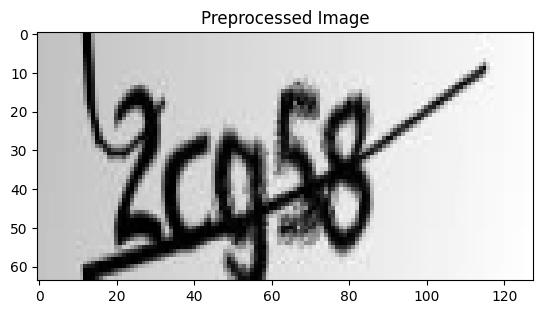

In [51]:
import matplotlib.pyplot as plt

# Load and preprocess your image
image = preprocess_image('2cg58.png')

# Visualize the preprocessed image to verify it looks correct
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.show()

In [52]:
# Make a prediction
prediction = model.predict(image)

# Print the raw prediction probabilities to see individual character confidence
print("Raw Prediction Probabilities:", prediction)

# Print the predicted text using decode_prediction
predicted_text = decode_prediction(prediction)
print("Predicted Text:", predicted_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw Prediction Probabilities: [[0.03155223 0.02984313 0.02715132 0.03344642 0.02506833 0.02869423
  0.02528087 0.02723484 0.02132499 0.02009942 0.02717571 0.0223691
  0.02150334 0.02871592 0.03250552 0.02642764 0.02778272 0.02934065
  0.02711552 0.03137064 0.02587597 0.03567552 0.03764609 0.02441792
  0.02552979 0.02196886 0.02823299 0.02419094 0.04060887 0.02576802
  0.03147084 0.025176   0.03230465 0.02586037 0.02218938 0.02908133]]
Predicted Text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


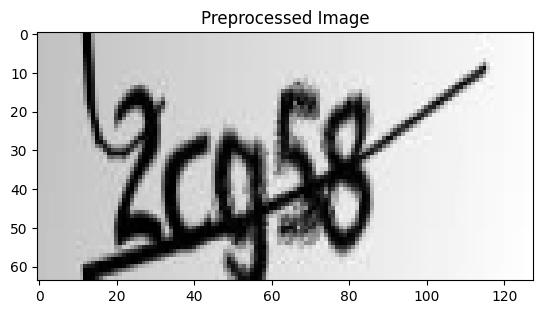

In [54]:
import matplotlib.pyplot as plt
image = preprocess_image('2cg58.png')
plt.imshow(image.squeeze(), cmap='gray')  # If grayscale
plt.title("Preprocessed Image")
plt.show()

In [56]:
prediction = model.predict(image)
print("Raw Prediction Probabilities:", prediction) # Removed the extra space before print

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Raw Prediction Probabilities: [[0.03155223 0.02984313 0.02715132 0.03344642 0.02506833 0.02869423
  0.02528087 0.02723484 0.02132499 0.02009942 0.02717571 0.0223691
  0.02150334 0.02871592 0.03250552 0.02642764 0.02778272 0.02934065
  0.02711552 0.03137064 0.02587597 0.03567552 0.03764609 0.02441792
  0.02552979 0.02196886 0.02823299 0.02419094 0.04060887 0.02576802
  0.03147084 0.025176   0.03230465 0.02586037 0.02218938 0.02908133]]


In [58]:
predicted_chars = [characters[np.argmax(p)] for p in prediction[0]]

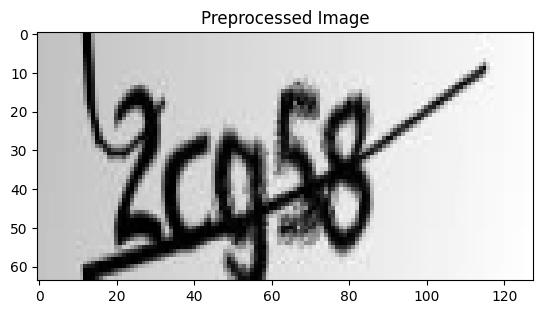

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Raw Prediction Probabilities: [[0.03155223 0.02984313 0.02715132 0.03344642 0.02506833 0.02869423
  0.02528087 0.02723484 0.02132499 0.02009942 0.02717571 0.0223691
  0.02150334 0.02871592 0.03250552 0.02642764 0.02778272 0.02934065
  0.02711552 0.03137064 0.02587597 0.03567552 0.03764609 0.02441792
  0.02552979 0.02196886 0.02823299 0.02419094 0.04060887 0.02576802
  0.03147084 0.025176   0.03230465 0.02586037 0.02218938 0.02908133]]
Predicted CAPTCHA text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [59]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ... (rest of the code for preprocessing, decoding, etc.)

# Load and preprocess the CAPTCHA image
image_filename = "2cg58.png"
image = preprocess_image(image_filename)

# Debug: Visualize preprocessed image
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Make a prediction
prediction = model.predict(image)

# Debug: Print raw probabilities
print("Raw Prediction Probabilities:", prediction)

# Get the predicted text (debug if needed with manual decoding)
predicted_text = decode_prediction(prediction)
print(f"Predicted CAPTCHA text: {predicted_text}")

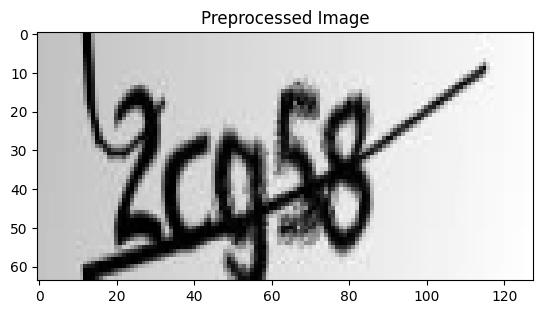

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Raw Prediction Probabilities: [[0.03155223 0.02984313 0.02715132 0.03344642 0.02506833 0.02869423
  0.02528087 0.02723484 0.02132499 0.02009942 0.02717571 0.0223691
  0.02150334 0.02871592 0.03250552 0.02642764 0.02778272 0.02934065
  0.02711552 0.03137064 0.02587597 0.03567552 0.03764609 0.02441792
  0.02552979 0.02196886 0.02823299 0.02419094 0.04060887 0.02576802
  0.03147084 0.025176   0.03230465 0.02586037 0.02218938 0.02908133]]
Predicted CAPTCHA text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Predicted Characters (manually decoded): ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


In [60]:
# Debug: Visualize preprocessed image
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Preprocessed Image")
plt.show()

# Make a prediction
prediction = model.predict(image)

# Debug: Print raw probabilities
print("Raw Prediction Probabilities:", prediction)

# Get the predicted text (debug if needed with manual decoding)
predicted_text = decode_prediction(prediction)
print(f"Predicted CAPTCHA text: {predicted_text}")

# Debug using raw probabilities
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
predicted_chars = [characters[np.argmax(p)] for p in prediction[0]]
print("Predicted Characters (manually decoded):", predicted_chars)

In [62]:
# ... (your image loading and preprocessing)

# Convert the image to the correct data type (uint8)
image = (image * 255).astype(np.uint8)  # Assuming 'image' is normalized to [0, 1]

# If 'image' has a batch dimension, squeeze it to get a 2D image
image = image.squeeze()

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# ... (continue with morphological operations and character extraction)

In [63]:
import cv2
import numpy as np

# ... (your image loading and preprocessing)

# Convert the image to the correct data type (uint8)
image = (image * 255).astype(np.uint8)  # Assuming 'image' is normalized to [0, 1]

# If 'image' has a batch dimension, squeeze it to get a 2D image
image = image.squeeze()

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Morphological operations (example)
kernel = np.ones((3, 3), np.uint8)  # Define a kernel (structuring element)


In [65]:
import cv2
import numpy as np

# ... (your image loading and preprocessing)

# Convert the image to the correct data type (uint8)
image = (image * 255).astype(np.uint8)  # Assuming 'image' is normalized to [0, 1]

# If 'image' has a batch dimension, squeeze it to get a 2D image
image = image.squeeze()

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Morphological operations (example)
kernel = np.ones((3, 3), np.uint8)  # Define a kernel (structuring element)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel) # Apply morphological opening


segmented_chars = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w * h > 100:  # Filter by area to remove noise
        char_img = opening[y:y + h, x:x + w]  # Extract character image from 'opening'
        segmented_chars.append(char_img)

# Now you have a list of segmented characters in 'segmented_chars'

In [66]:
import cv2
import numpy as np

# ... (previous code for image loading, preprocessing, and character segmentation)

# Preprocess segmented characters
preprocessed_chars = []
for char_img in segmented_chars:
    # Resize to match the input size of your model
    char_img = cv2.resize(char_img, (32, 32))  # Replace (32, 32) with your model's input shape

    # Normalize pixel values (if your model expects normalized input)
    char_img = char_img / 255.0

    # Add channel dimension (if your model expects a 3D input)
    char_img = np.expand_dims(char_img, axis=-1)

    preprocessed_chars.append(char_img)

# Convert to a NumPy array for batch prediction
preprocessed_chars = np.array(preprocessed_chars)

# Now you can use 'preprocessed_chars' for prediction with your model

In [67]:
# ... (previous code for preprocessing)

# 1. Prediction
predictions = model.predict(preprocessed_chars)

# 2. Decoding Predictions (using your decode_prediction function)
predicted_captcha_text = ""
for pred in predictions:
    predicted_captcha_text += decode_prediction(np.expand_dims(pred, axis=0)) # Add batch dimension for single prediction

print(f"Predicted CAPTCHA text: {predicted_captcha_text}")

InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/dense_4_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-67-5254672a8918>", line 4, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py", line 148, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/activations/activations.py", line 47, in relu

  File "/usr/local/lib/python3.11/dist-packages/keras/src/activations/activations.py", line 101, in static_call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [1,7200], In[1]: [62496,128]
	 [[{{node sequential_2_1/dense_4_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_4342]

In [68]:
# ... (previous code for image loading, preprocessing, and character segmentation)

# Preprocess segmented characters
preprocessed_chars = []
for char_img in segmented_chars:
    # Resize to match the input size of your model
    char_img = cv2.resize(char_img, (128, 64))  # Resized to (128, 64) to match model's input shape

    # Normalize pixel values (if your model expects normalized input)
    char_img = char_img / 255.0

    # Add channel dimension (if your model expects a 3D input)
    char_img = np.expand_dims(char_img, axis=-1)

    preprocessed_chars.append(char_img)

# Convert to a NumPy array for batch prediction
preprocessed_chars = np.array(preprocessed_chars)

# 1. Prediction
predictions = model.predict(preprocessed_chars)

# 2. Decoding Predictions (using your decode_prediction function)
predicted_captcha_text = ""
for pred in predictions:
    predicted_captcha_text += decode_prediction(np.expand_dims(pred, axis=0)) # Add batch dimension for single prediction

print(f"Predicted CAPTCHA text: {predicted_captcha_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted CAPTCHA text: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [69]:
import cv2
import numpy as np

# ... (your image loading and preprocessing)

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Morphological operations (example)
kernel = np.ones((3, 3), np.uint8)  # Define a kernel (structuring element)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel) # Apply morphological opening

# Find contours
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

segmented_chars = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Adjust the area threshold and aspect ratio check as needed
    if w * h > 100 and 0.2 < w / h < 1.0:  # Filter by area and aspect ratio
        char_img = opening[y:y + h, x:x + w]  # Extract character image from 'opening'
        segmented_chars.append(char_img)

# ... (rest of your code)

In [70]:
# ... (after prediction)

# Manually decode predictions and compare with your decode_prediction function's output
characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"
predicted_chars = [characters[np.argmax(p)] for p in prediction[0]]
print("Predicted Characters (manually decoded):", predicted_chars)

print("Predicted Text (using decode_prediction):", decode_prediction(prediction))

Predicted Characters (manually decoded): ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
Predicted Text (using decode_prediction): AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
